In [30]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [31]:
import pandas as pd
import util.utilities as util
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 1. Dataset

In [32]:
# Import papers spreadsheet to dataset
df_sms_extraction = pd.read_excel('../../dataset/Extraction_form_basic.xlsx')
df_sms_extraction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 35 columns):
Paper Id                                                                                                      46 non-null int64
Citation                                                                                                      46 non-null object
Google Scholar                                                                                                46 non-null object
Year                                                                                                          46 non-null object
Authors                                                                                                       46 non-null object
Title                                                                                                         46 non-null object
Publication Year                                                                                              46 non-null in

In [33]:
impotant_columns = ['Paper Id', 'Citation', 'Title','Q1 Type of ATD (Based on Li et al 2015)', 'Q2(Measure)', 'Q3(Monitoring)', 'Q4(Techniques and tools)', 'Q5(calculate the cost)', 'Q6(How ATD is management?)', 'Q7 Research Type (Evaluation Research, Validation Research, Solution Proposal, Philosophycal paper, Other)', 'Method of research (Case study, Survey, Interview, Experiment, Observation)','Limitations', 'Future Works']

df_sms_extraction[impotant_columns]
#df_sms_extraction[df_sms_extraction["Method of research (Case study, Survey, Interview, Experiment, Observation)"].isna()][['Paper Id', 'Citation', 'Title','Q3(Techniques and tools)','Method of research (Case study, Survey, Interview, Experiment, Observation)', 'Limitations', 'Future Works']]

,Paper Id,Citation,Title,Q1 Type of ATD (Based on Li et al 2015),Q2(Measure),Q3(Monitoring),Q4(Techniques and tools),Q5(calculate the cost),Q6(How ATD is management?),"Q7 Research Type (Evaluation Research, Validation Research, Solution Proposal, Philosophycal paper, Other)","Method of research (Case study, Survey, Interview, Experiment, Observation)",Limitations,Future Works
0,1,Perez et al. 2019,A Proposed Model-driven Approach to Manage Arc...,Other,REBEL focuses on finding ATD items at architec...,The method performed a monitoring process for ...,"general:""Model-Driven Architecture Approach, N...",Yes. The amount of architectural decisions imp...,NaN,Evaluation research,"Case study, expert opinion, observation",In this research we faced several challenges t...,Future work will include convolutional neural ...
1,2,Martini et al 2017,A semi-automated framework for the identificat...,Complex architectural behavioral dependencies,Complexity measures of files,The framework performed a monitoring process f...,"general:""specialist technical evaluation, modu...",Developer Work Months (DWM). DWM is defined in...,NaN,Evaluation research,"Case study, expert opinion",To estimate the effort to fix the ATD is neces...,No
2,3,Roveda et al. 2018,Towards an Architectural Debt Index,Architecture Smells,It was defined a formula to calculate ATD inde...,The method performed a monitoring for each ver...,"general:""architecture smells, modularity""\n# \...",No,NaN,Evaluation research*,survey,The data validation should be performed in a r...,The authors would also like to detect differen...
3,4,Snipes et al. 2018,A Case Study of the Effects of Architecture De...,Complex architectural behavioral dependencies,Architectural Root,The case study performed a set of evaluations ...,"general:""architectural root, source code, revi...",The method proposed can calculate the expected...,NaN,Evaluation research,case study,Only one project in short time of 9 months.,"In future work, we plan to study the process o..."
4,5,Nayebi et al. 2019,A Longitudinal Study of Identifying and Paying...,Complex architectural behavioral dependencies,In this study we measured architecture debt in...,"Yes, during two years the releases were monito...","general:""maintainability, architecture flaws, ...",The method proposed check the time effort refa...,NaN,Evaluation research,case study,The calculus of cost of ATDI depends on the pa...,No
5,7,Feng et al. 2019,Active Hotspot: An Issue-Oriented Model to Mon...,System-level structure quality issues,Hotspot. Calculate a hotspot to detect problem...,The authors monitored the evolution of hostspo...,"general:""source code, revision history, hotspo...",No. The method proposed just check if the hots...,NaN,Evaluation research*,Empirical study,First the accuracy of our study depends on th...,"The amount of files choose, as the threshodld,..."
6,9,Li et al. 2014,An Empirical Investigation of Modularity Metr...,Architectural compliance issues,"Index of Package Changing Impact (IPCI), Inde...",The authors monitored the evolution of Indexes...,"general:""modularity, average number of modifie...",No. The method proposed just calculates the AT...,NaN,Evaluation research*,"Case study, Empirical investigation","In this case study, only C# OSS projects were ...",Based on the results and findings of this work...
7,10,Martini et al. 2016,An Empirically Developed Method to Aid Decisio...,Architectural compliance issues,Principal and Interest of ATD. There is a se...,The Principal and Interest is analysed by Soft...,"general:""source code, software architecture do...",Using particular formulas created by AnaConDeb...,NaN,Evaluation research,"Case study, industrial practice, expert opinio...",There are some limitations in this study. Most...,Future work aims at increasing the precision o...
8,13,Xiao et al. 2016,Identifying and Quantifying Architectural Debt,Architecture Smells,It was created a specific concept about ArchDe...,It was monitored th

In [34]:
c_citation = 'Citation'
c_title = 'Title'
cq1 = 'Q1 Type of ATD (Based on Li et al 2015)'
cq2 = 'Q2(Measure)'
cq3 = 'Q3(Monitoring)'
cq4 = 'Q4(Techniques and tools)'                                                                                    
cq5 = 'Q5(calculate the cost)'                                                                                      
cq6 = 'Q6(How ATD is management?)'
cq7 = 'Q7 Research Type (Evaluation Research, Validation Research, Solution Proposal, Philosophycal paper, Other)'

questions_columns = [c_citation, c_title, cq1, cq2, cq3, cq4, cq5, cq6, cq7]
df_sms_extraction[questions_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 9 columns):
Citation                                                                                                      46 non-null object
Title                                                                                                         46 non-null object
Q1 Type of ATD (Based on Li et al 2015)                                                                       26 non-null object
Q2(Measure)                                                                                                   39 non-null object
Q3(Monitoring)                                                                                                39 non-null object
Q4(Techniques and tools)                                                                                      39 non-null object
Q5(calculate the cost)                                                                                        39 non-null ob

In [35]:
list_id_main_papers = [1,2,4,5,9,10,21,22,27,48,33,31,81]
df_sms_extraction[questions_columns][df_sms_extraction['Paper Id'].isin(list_id_main_papers)]

,Citation,Title,Q1 Type of ATD (Based on Li et al 2015),Q2(Measure),Q3(Monitoring),Q4(Techniques and tools),Q5(calculate the cost),Q6(How ATD is management?),"Q7 Research Type (Evaluation Research, Validation Research, Solution Proposal, Philosophycal paper, Other)"
0,Perez et al. 2019,A Proposed Model-driven Approach to Manage Arc...,Other,REBEL focuses on finding ATD items at architec...,The method performed a monitoring process for ...,"general:""Model-Driven Architecture Approach, N...",Yes. The amount of architectural decisions imp...,NaN,Evaluation research
1,Martini et al 2017,A semi-automated framework for the identificat...,Complex architectural behavioral dependencies,Complexity measures of files,The framework performed a monitoring process f...,"general:""specialist technical evaluation, modu...",Developer Work Months (DWM). DWM is defined in...,NaN,Evaluation research
3,Snipes et al. 2018,A Case Study of the Effects of Architecture De...,Complex architectural behavioral dependencies,Architectural Root,The case study performed a set of evaluations ...,"general:""architectural root, source code, revi...",The method proposed can calculate the expected...,NaN,Evaluation research
4,Nayebi et al. 2019,A Longitudinal Study of Identifying and Paying...,Complex architectural behavioral dependencies,In this study we measured architecture debt in...,"Yes, during two years the releases were monito...","general:""maintainability, architecture flaws, ...",The method proposed check the time effort refa...,NaN,Evaluation research
6,Li et al. 2014,An Empirical Investigation of Modularity Metr...,Architectural compliance issues,"Index of Package Changing Impact (IPCI), Inde...",The authors monitored the evolution of Indexes...,"general:""modularity, average number of modifie...",No. The method proposed just calculates the AT...,NaN,Evaluation research*
7,Martini et al. 2016,An Empirically Developed Method to Aid Decisio...,Architectural compliance issues,Principal and Interest of ATD. There is a se...,The Principal and Interest is analysed by Soft...,"general:""source code, software architecture do...",Using particular formulas created by AnaConDeb...,NaN,Evaluation research
13,Li et al. 2015,Architectural Technical Debt Identification ba...,Architectural compliance issues,ATD Itens based on templated suggested by auth...,The approach is performed for each release usi...,"general:""software architectural documentation...",For each ATD item is calculated principal and ...,NaN,Evaluation research
14,Martini et al. 2014,Architecture Technical Debt: Understanding Cau...,Architectural compliance issues,The authors proposed a crisis point based on A...,The ATD items are monitored during releaase pl...,"general:""Agile Software Development, Taxonomy...",The authors have been defined a crisis point o...,NaN,Evaluation research
15,Martini et al. 2016,Estimating and Quantifying the Benefits of Ref...,System-level structure quality issues,It is calculated the effort of modularization ...,It was applied the framework for each release ...,"general:""modularization, code churn, source c...",It is used a formula to calculate the effort i...,NaN,Evaluation research
18,Kazman et al. 2015,A Case Study in Locating the Architectural Roo...,System-level structure quality issues,Hotspot. Calculate a hotspot to detect problem...,The approach of DRSpace is performed for each ...,"general:""hotspot, refactoring, source code, r...",The Architectural Debt was quantified using Te...,NaN,Evaluation research


## 1.1 List of Analysed Papers

In [36]:
for item in zip(list(df_sms_extraction['Citation']), list(df_sms_extraction['Title'])):
    citation = item[0]
    title = ' '.join(item[1].split())
    print('({}, {})'.format(citation, title))

(Perez et al. 2019, A Proposed Model-driven Approach to Manage Architectural Technical Debt Life Cycle)
(Martini et al 2017, A semi-automated framework for the identification and estimation of Architectural Technical Debt: A comparative case-study on the modularization of a software component)
(Roveda et al. 2018, Towards an Architectural Debt Index)
(Snipes et al. 2018, A Case Study of the Effects of Architecture Debt on Software Evolution Effort)
(Nayebi et al. 2019, A Longitudinal Study of Identifying and Paying Down architecture debt)
(Feng et al. 2019, Active Hotspot: An Issue-Oriented Model to Monitor Software Evolution and Degradation)
(Li et al. 2014, An Empirical Investigation of Modularity Metrics for Indicating architectural technical debt)
(Martini et al. 2016, An Empirically Developed Method to Aid Decisions on Architectural Technical Debt Refactoring: AnaConDebt)
(Xiao et al. 2016, Identifying and Quantifying Architectural Debt)
(Verdecchia 2018, Identifying Architectural

## 1.2 List of Authors

In [37]:
list_of_authors, list_of_uniques_authors = util.list_of_items(df_data=df_sms_extraction, column_name='Authors')


List of all 158 Authors : ['', '', 'A Tahmid', 'A. Nandakumar', 'Alan MacCormack', 'Alexander Chatzigeorgiou', 'Alexander Chatzigeorgiou', 'Alexander von Zitzewitz', 'Alexandra Szynkarski', 'Alfred Zimmermann', 'Alfred Zimmermann', 'Andrea Biaggi', 'Andriy Shapochka', 'Andrzej Zalewski', 'Antonela Tommasel', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Antonio Martini', 'Apostolos Ampatzoglou', 'Apostolos Ampatzoglou', 'Apostolos Ampatzoglou', 'Areti Ampatzoglou', 'Bill Curtis', 'Boris Perez', 'Chris Carlson', 'Claudia Raibulet', 'Clemente Izurieta', 'Damian A. Tamburri', 'Daniel J. Sturtevant', 'Dario Correal', 'Darius Sas', 'David Rice', 'Di Cui', 'Diomidis Spinellis', 'E Shihab', 'Elvira-Maria Arvanitou', 'Erik Sikander', 'Erik Sikander', 'Francesca Arcelli Fontana', 'Francesca Arcelli Fontana', 'Franc

In [38]:
list_of_most_common_authors = Counter(list_of_authors).most_common()
print(list_of_most_common_authors)

[('Antonio Martini', 13), ('Jan Bosch', 7), ('Rick Kazman', 7), ('Yuanfang Cai', 7), ('Francesca Arcelli Fontana', 6), ('Paris Avgeriou', 5), ('Qiong Feng', 5), ('Ran Mo', 4), ('Riccardo Roveda', 4), ('Apostolos Ampatzoglou', 3), ('Lu Xiao', 3), ('Marco Zanoni', 3), ('', 2), ('Alexander Chatzigeorgiou', 2), ('Alfred Zimmermann', 2), ('Erik Sikander', 2), ('Ilaria Pigazzini', 2), ('Jonas Fritzsch', 2), ('Justus Bogner', 2), ('Michel Chaudron', 2), ('Niel Madlani', 2), ('Peng Liang', 2), ('Stefan Wagner', 2), ('Terese Besker', 2), ('Zengyang Li', 2), ('A Tahmid', 1), ('A. Nandakumar', 1), ('Alan MacCormack', 1), ('Alexander von Zitzewitz', 1), ('Alexandra Szynkarski', 1), ('Andrea Biaggi', 1), ('Andriy Shapochka', 1), ('Andrzej Zalewski', 1), ('Antonela Tommasel', 1), ('Areti Ampatzoglou', 1), ('Bill Curtis', 1), ('Boris Perez', 1), ('Chris Carlson', 1), ('Claudia Raibulet', 1), ('Clemente Izurieta', 1), ('Damian A. Tamburri', 1), ('Daniel J. Sturtevant', 1), ('Dario Correal', 1), ('Dari

## 1.3 List of Key words

In [39]:
list_of_key_words, list_of_uniques_key_words = util.list_of_items(df_data=df_sms_extraction, column_name='Key words')

List of all 199 Key words : ['Agile software development', 'Android', 'Architectural Debt', 'Architectural Technical Debt', 'Architectural deb', 'Architectural debt', 'Architectural smells', 'Architectural technical debt', 'Architectural technical debt', 'Architectural technical debt', 'Architectural technical debt management', 'Architecture Design Decisions', 'Architecture Recovery', 'Architecture Technical Debt', 'Architecture assessment', 'Architecture debt', 'Architecture erosion', 'Automotive engineering', 'Business', 'Cloud computing security', 'Complex systems', 'Compliance Checking', 'Computer architecture', 'Computer architecture', 'Computer architecture', 'Context', 'Cost-benefit analysis', 'Criticality', 'Design', 'Design debt', 'Design refactoring', 'Development Cost', 'Economics', 'Empirical Study', 'Estimation', 'Estimation', 'Feature Prioritization', 'Grounded Theory', 'History', 'IEEE Newspaper', 'Information Need', 'Longitudinal study', 'Maintainability', 'Management',

In [40]:
# Normalize the key words to lower
list_temp = []
for each in list_of_key_words:
    list_temp.append(each.lower())
list_of_key_words = list_temp

# Sort keys words by frequency
list_of_most_common_key_words = Counter(list_of_key_words).most_common()
print(list_of_most_common_key_words)

[('technical debt', 17), ('software architecture', 15), ('architectural technical debt', 7), ('agile software development', 3), ('architectural debt', 3), ('architectural smells', 3), ('computer architecture', 3), ('qualitative model', 3), ('refactoring', 3), ('software management', 3), ('software quality', 3), ('survey', 3), ('architecture debt', 2), ('estimation', 2), ('maintainability', 2), ('measurement', 2), ('modularization', 2), ('software evolution', 2), ('software maintenance', 2), ('software life-cycle', 2), ('industry', 2), ('android', 1), ('architectural deb', 1), ('architectural technical debt management', 1), ('architecture design decisions', 1), ('architecture recovery', 1), ('architecture technical debt', 1), ('architecture assessment', 1), ('architecture erosion', 1), ('automotive engineering', 1), ('business', 1), ('cloud computing security', 1), ('complex systems', 1), ('compliance checking', 1), ('context', 1), ('cost-benefit analysis', 1), ('criticality', 1), ('des

## 1.4 List of Venues

In [41]:
list_of_venues = []
for item in list(df_sms_extraction['Name of Venue']): 
    item = ' '.join(item.split())
    list_of_venues.append(item)
list_of_venues.sort()

list_of_most_common_venues = Counter(list_of_venues).most_common()
print(list_of_most_common_venues)

[('Euromicro Conference on Software Engineering and Advanced Applications', 6), ('International Conference on Technical Debt (TechDebt)', 6), ('International Conference on Software Engineering', 3), ('International Workshop on Managing Technical Debt (MTD)', 3), ('European Conference on Software Architecture', 2), ('International Conference on Software Maintenance and Evolution (ICSME)', 2), ('Asia Pacific Software Engineering Conference', 1), ('Conference on Software Achitecture', 1), ('Conference on Software Architecture and European Conference on Software Architecture', 1), ('EE Transactions on Software Engineering', 1), ('IEEE Software', 1), ('Information and Software Technology Journal', 1), ('International Conference on Automated Software Engineering (ASE)', 1), ('International Conference on Mobile Software Engineering and Systems', 1), ('International Conference on Software Analysis, Evolution and Reengineering', 1), ('International Conference on Software Architecture Companion 

In [42]:
for each in list_of_most_common_venues: 
    print(each)

('Euromicro Conference on Software Engineering and Advanced Applications', 6)
('International Conference on Technical Debt (TechDebt)', 6)
('International Conference on Software Engineering', 3)
('International Workshop on Managing Technical Debt (MTD)', 3)
('European Conference on Software Architecture', 2)
('International Conference on Software Maintenance and Evolution (ICSME)', 2)
('Asia Pacific Software Engineering Conference', 1)
('Conference on Software Achitecture', 1)
('Conference on Software Architecture and European Conference on Software Architecture', 1)
('EE Transactions on Software Engineering', 1)
('IEEE Software', 1)
('Information and Software Technology Journal', 1)
('International Conference on Automated Software Engineering (ASE)', 1)
('International Conference on Mobile Software Engineering and Systems', 1)
('International Conference on Software Analysis, Evolution and Reengineering', 1)
('International Conference on Software Architecture Companion (ICSA-C)', 1)
('

## 1.5 Basic statistic

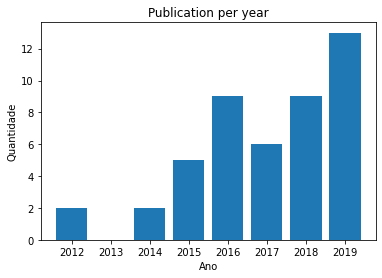

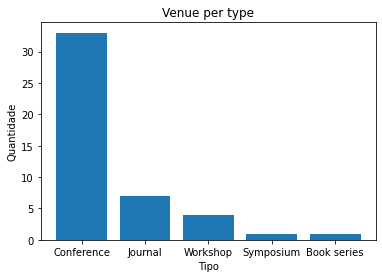

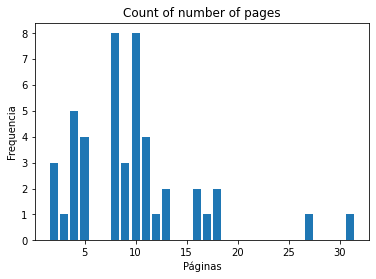

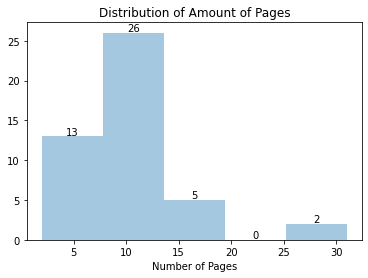

In [43]:
publication_per_year = dict(df_sms_extraction['Publication Year'].value_counts())
util.show_bar_plot_complete(publication_per_year, 'Publication per year', x_label='Ano', y_label='Quantidade')

venue_per_type = dict(df_sms_extraction['Venue Type'].value_counts())
util.show_bar_plot_complete(venue_per_type, 'Venue per type', x_label='Tipo', y_label='Quantidade')

number_of_page_grouped = dict(df_sms_extraction['Number of Pages'].value_counts())
util.show_bar_plot_complete(number_of_page_grouped, 'Count of number of pages', x_label='Páginas', y_label='Frequencia')

util.show_histogram(df_data=df_sms_extraction['Number of Pages'], title="Distribution of Amount of Pages", bins=5)

### Petersen et al [1] proposed that the mapping study could provide good overview of area, to identify research gaps, visualization of research trends, related work identification, and validation of gathred references.

In [44]:
# overview of area

# identify research gaps

# visualization of research trends

#### [1] Petersen et al. 2015. "Guidelines for conducting systematic mapping studies in software engineering: An update"